# Initialization

In [1]:
from bmb import ProcessingDB
from bmb.source.cross_classification import category_pairs
from bmb.source.analysis import visualize_categorical_association
from tqdm.notebook import tqdm
from collections import defaultdict
import random

db       = ProcessingDB()
film_ids = db.get( 'SELECT id FROM Film WHERE year > 1930')


# Load Genre Combinations

In [2]:
genre_combinations = dict()
GENRES_FOR_FILM_ID = """
    SELECT Genre.text 
    FROM FilmGenre JOIN Genre ON FilmGenre.Genre=Genre.id 
    WHERE FilmGenre.film=?"""
for film_id in tqdm( film_ids):
    genre_combinations[ film_id] = db.get( GENRES_FOR_FILM_ID, film_id )

  0%|          | 0/15486 [00:00<?, ?it/s]

# Create Category Association Data

In [3]:
from collections import defaultdict

num_films    = len( genre_combinations)
genre_pairs  = list()
genre_count  = defaultdict( lambda: 0)
year_count   = defaultdict( lambda: 0)
decade_count = defaultdict( lambda: 0)

year_genres = list()
for film_id, genre_combination in tqdm(genre_combinations.items()):
    genre_pairs += category_pairs( genre_combination, reflexive=True)
    
    year = db.select_one( 'year', 'Film', id=film_id)
    year_count[ year] += 1
    
    decade = f"{(year // 10) * 10}'s"
    decade_count[ decade] += 1
    
    for genre in genre_combination:
        genre_count[ genre] += 1
        year_genres.append(( f"{(year // 10) * 10}'s", genre))

  0%|          | 0/15486 [00:00<?, ?it/s]

# Visualize

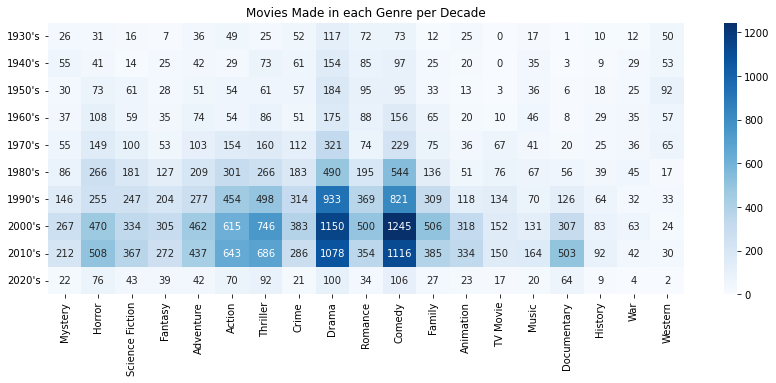

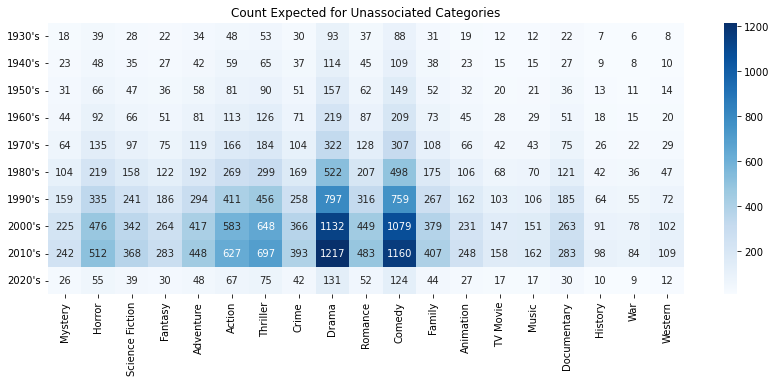

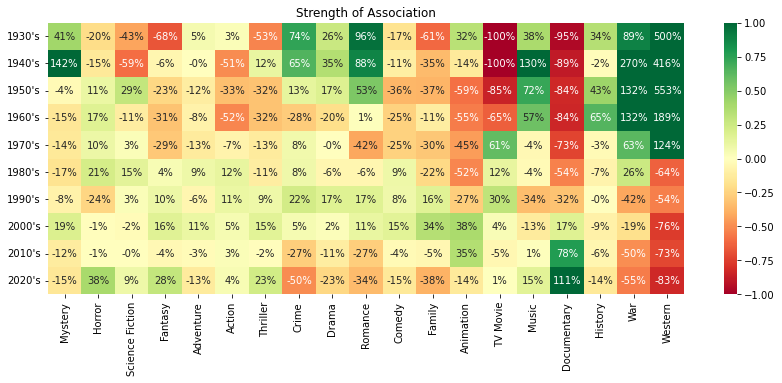

In [4]:
from bmb.source.analysis import visualize_categorical_association
visualize_categorical_association(
    year_genres,
    num_films,
    decade_count,
    genre_count,
    sorted(set((t[0] for t in year_genres))),
    db.genre_order(),#[ g for g in db.genre_order() if g not in ("Documentary", "TV Movie", "Western", "War")],#
    title="Movies Made in each Genre per Decade"
)